In [1]:
#Ready to be published 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_path = "./data/water_pvp/"
all_files = os.listdir(data_path)
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
csv_files

['water-PVP_0.csv',
 'water-PVP_1_7.csv',
 'water-PVP_2_7.csv',
 'water-PVP_3_7.csv',
 'water-PVP_4_7.csv',
 'water-PVP_5_7.csv',
 'water-PVP_6_7.csv',
 'water-PVP_7_7.csv']

In [13]:
import numpy as np
def min_max_scaling(y, min_val, max_val):
    return (y - min_val) / (max_val - min_val)
# Sample target variable
target_variable = np.array([0.891,1.825, 4.306, 7.601, 9.347, 16.51, 33.13, 61.40])

# Min-Max Scaling
min_val = 0.891
max_val = 61.40
scaled_target_variable = min_max_scaling(target_variable, min_val, max_val)

# Print the scaled target variable
print("Original Target Variable:", target_variable)
print("Scaled Target Variable (Min-Max):", scaled_target_variable)
# Regenerate the original target variable
regenerated_target_variable = scaled_target_variable * (max_val - min_val) + min_val


print("Scaled Target Variable (Min-Max):", regenerated_target_variable)

Original Target Variable: [ 0.891  1.825  4.306  7.601  9.347 16.51  33.13  61.4  ]
Scaled Target Variable (Min-Max): [0.         0.01543572 0.05643789 0.11089259 0.13974781 0.25812689
 0.53279677 1.        ]
Scaled Target Variable (Min-Max): [ 0.891  1.825  4.306  7.601  9.347 16.51  33.13  61.4  ]


In [14]:
def categories_to_viscosities(argument):
    switcher = {
        0: 0,
        1: 0.01543572,
        2: 0.05643789,
        3: 0.11089259,
        4: 0.13974781,
        5: 0.25812689,
        6: 0.53279677,
        7: 1,
    }
    return switcher.get(argument, "nothing")


In [15]:
oil_datas = []
for f_name in csv_files:
    print(f_name)
    category  = f_name.split('_')[1].split('.')[0]
    viscosity = categories_to_viscosities(int(category))
    print(viscosity)
    oil_datas.append({
        'v': viscosity,  # viscosity
        'fn': f_name.split('.')[0],  # file name
        'df': pd.read_csv(data_path + f_name)  # data frame
    })

#oil_datas[3]['df'].to_csv("../data/out.csv") 

water-PVP_0.csv
0
water-PVP_1_7.csv
0.01543572
water-PVP_2_7.csv
0.05643789
water-PVP_3_7.csv
0.11089259
water-PVP_4_7.csv
0.13974781
water-PVP_5_7.csv
0.25812689
water-PVP_6_7.csv
0.53279677
water-PVP_7_7.csv
1


In [16]:
columns_to_drop = ['No. Droplet', 'RunTime (second)', 'Length of remaining liquid on dropper', 'State of droplet']
for oil_data in oil_datas:
    df = oil_data['df']
    oil_data['single_all'] = df[df['State of droplet'] == "Before_detachment"].drop(columns_to_drop, axis=1)
oil_datas[0]['single_all'].head()
#oil_datas[0]['single_all'].to_csv("../data/out1.csv") 
df.describe()

,RunTime (second),Time per droplet (Second),No. Droplet,Area of droplet (pixels),Perimeter of droplet (pixels),Width/Length of droplet (pixels),Deltoid Diagonal Intersection Y Min Y Distance / Total Length,Center of mass X coord,Center of mass Y coord,Length Of Droplet,Y max,Diameter of droplet,Thinnest part of droplet,Fitting deltoid upper side,Fitting deltoid lower side,Fitting deltoid degree between different sides,Length of remaining liquid on dropper
count,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000
mean,617.267166,2.085472,149.122349,21243.612973,449.450204,0.894330,0.506602,280.391104,219.995019,224.829250,326.094924,187.790378,25.142188,155.483877,141.743015,66.107942,0.356710
std,355.540498,1.207756,85.194912,10043.186826,154.288554,0.173956,0.116793,0.887456,41.186899,74.335359,78.869740,35.676471,36.471465,60.737409,30.857072,29.974631,4.545014
min,1.446956,0.000000,2.000000,1945.000000,101.000000,0.219400,0.112700,270.000000,139.000000,62.000000,167.000000,102.000000,0.000000,54.744863,61.294372,0.000000,0.000000
25%,309.381864,1.040208,75.000000,13281.000000,337.000000,0.778200,0.423600,280.000000,190.000000,169.000000,268.000000,163.000000,9.000000,109.224539,119.331471,71.409302,0.000000
50%,617.263428,2.087084,149.000000,21912.000000,454.000000,0.867800,0.503800,280.000000,221.000000,229.000000,328.000000,196.000000,12.000000,151.162165,145.206749,77.763870,0.000000
75%,925.178332,3.127292,223.000000,29554.000000,573.000000,0.971100,0.607300,281.000000,244.000000,282.000000,383.000000,218.000000,14.000000,193.669822,165.239220,82.982074,0.000000
max,1233.079900,4.540908,296.000000,44450.000000,956.000000,1.691200,1.000000,283.000000,550.000000,456.000000,719.000000,267.000000,138.000000,632.673692,209.773688,90.000000,85.000000


In [17]:
compare_mean = []
for i, oil_data in enumerate(oil_datas):
    df = pd.Series(oil_data['single_all'].mean(), name=oil_data['fn'].split('_')[1])
    compare_mean.append(df)
compare_mean = pd.concat(compare_mean, axis=1)
compare_mean


,0,1,2,3,4,5,6,7
Time per droplet (Second),4.032308,3.824284,3.802482,4.406358,4.358011,4.401413,4.176161,4.141913
Area of droplet (pixels),41540.219780,40023.875536,42611.609890,39911.111524,39681.882979,40047.575000,40483.663043,40374.169492
Perimeter of droplet (pixels),851.340659,843.935622,874.065934,849.762082,853.723404,859.930000,868.407609,878.579661
Width/Length of droplet (pixels),0.586667,0.582704,0.585270,0.576288,0.570911,0.569273,0.560647,0.550106
Deltoid Diagonal Intersection Y Min Y Distance / Total Length,0.680690,0.678880,0.687373,0.688006,0.686137,0.685174,0.697030,0.702391
Center of mass X coord,270.939560,271.270386,269.049451,276.200743,277.326241,277.255000,277.364130,277.538983
Center of mass Y coord,336.159341,331.587983,330.010989,336.427509,336.865248,339.230000,342.798913,345.508475
Length Of Droplet,423.280220,417.502146,416.500000,423.107807,425.333333,428.770000,433.429348,440.386441
Y max,522.280220,516.502146,515.500000,522.107807,524.333333,527.770000,532.429348,539.386441
Diameter of droplet,245.280220,240.236052,242.137363,241.524164,240.531915,241.640000,240.304348,239.698305


In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [19]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
datasets_dfs = []
for oil_data in oil_datas:
    df = oil_data['single_all']
    df['viscosity'] = oil_data['v']
    datasets_dfs.append(df)  


In [21]:
def split_train_valid_test(X, y):
    X_erm, X_test, y_erm, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_valid, y_train, y_valid = train_test_split(X_erm, y_erm, test_size=0.30, random_state=50)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [22]:
def split_data_together():
    datasets = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(datasets[:,:-1])
    y = datasets[:, -1]
    print(f"X shape: ${X.shape}, Y shape: ${y.shape}")
    X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [23]:
def split_data_separate():
    datasets_together = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.StandardScaler() # StandardScaler() or MinMaxScaler() can be picked: 
    min_max_scaler.fit(datasets_together[:,:-1])
    splits = ([], [], [], [], [], []) #X_train, X_valid, X_test, y_train, y_valid, y_test
    for df in datasets_dfs:
        np_arr = df.values
        X = min_max_scaler.transform(np_arr[:,:-1])
        y = np_arr[:, -1]
        _splits = split_train_valid_test(X, y)
        for index, _split in enumerate(_splits):
            splits[index].append(_split)
    # return map(np.vstack, splits)
    return np.vstack(splits[0]), np.vstack(splits[1]), np.vstack(splits[2]),\
           np.hstack(splits[3]), np.hstack(splits[4]), np.hstack(splits[5]),

[ 35.82831084  61.26768616  72.66198435  81.92500565  89.67760271
  95.14403516  98.14711634  99.16942548  99.68938132  99.96782183
  99.99622919  99.99868999 100.         100.        ]


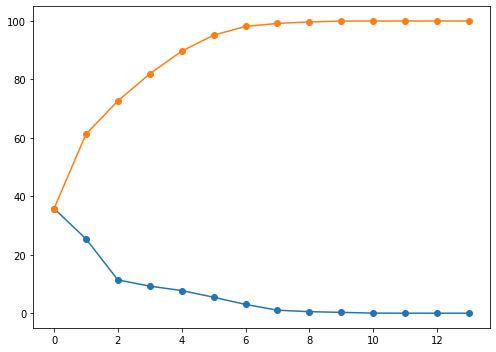

In [24]:
from sklearn.decomposition import PCA 
datasets_together = pd.concat(datasets_dfs, axis=0).values
pca = PCA()
scaled = StandardScaler().fit_transform(datasets_together[:,:-1])
# Fit the spectral data and extract the explained variance ratio
X1 = pca.fit(scaled)
expl_var_1 = X1.explained_variance_ratio_
print(np.cumsum(expl_var_1)*100)
# Plot data
with plt.style.context(()):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
    fig.set_tight_layout(True)
    ax1.plot(expl_var_1*100,'-o',label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1)*100,'-o', label = 'Cumulative variance %')



In [25]:
#X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_together()
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_separate()
print(f"X_train shape: {X_train.shape}, X_valid shape: {X_valid.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape},y_valid shape: {y_valid.shape}, y_test shape: {y_test.shape}")

X_train shape: (1018, 14), X_valid shape: (441, 14), X_test shape: (368, 14)
y_train shape: (1018,),y_valid shape: (441,), y_test shape: (368,)


In [28]:
def build_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=14))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return model

In [29]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train and y_train are your input features and labels
# Define the number of folds for cross-validation
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create lists to store results across folds
all_train_losses = []
all_val_losses = []
all_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Training Fold {fold + 1}")

    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build the model
    model = build_model()

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=500,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping],
                        verbose=0)

    # Store training and validation losses for later analysis
    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])

    # Evaluate the model on the validation set for this fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    all_scores.append(scores)

# Calculate average training and validation losses across folds
average_train_loss = np.mean(all_train_losses, axis=0)
average_val_loss = np.mean(all_val_losses, axis=0)

# Display average scores for each fold
for fold, scores in enumerate(all_scores):
    print(f"\nFold {fold + 1} Scores:")
    print(f"Loss: {scores[0]}")
    print(f"Mean Squared Error: {scores[1]}")


Training Fold 1
Training Fold 2
Training Fold 3
Training Fold 4
Training Fold 5

Fold 1 Scores:
Loss: 0.025503555312752724
Mean Squared Error: 0.025503555312752724

Fold 2 Scores:
Loss: 0.0030978538561612368
Mean Squared Error: 0.0030978538561612368

Fold 3 Scores:
Loss: 0.002468394348397851
Mean Squared Error: 0.002468394348397851

Fold 4 Scores:
Loss: 0.0032103771809488535
Mean Squared Error: 0.0032103771809488535

Fold 5 Scores:
Loss: 0.0029597992543131113
Mean Squared Error: 0.0029597992543131113


C:\Users\mmrad\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


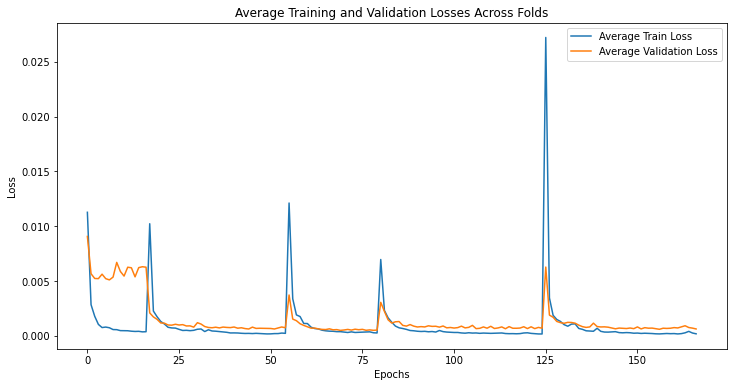

In [31]:

# Plot average training and validation losses
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(average_train_loss, label='Average Train Loss')
plt.plot(average_val_loss, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Losses Across Folds')
plt.legend()
plt.show()


In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


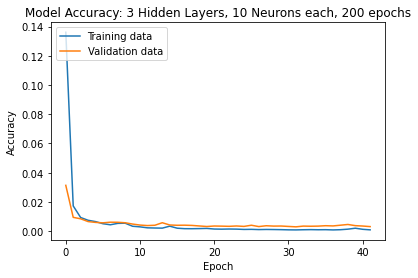

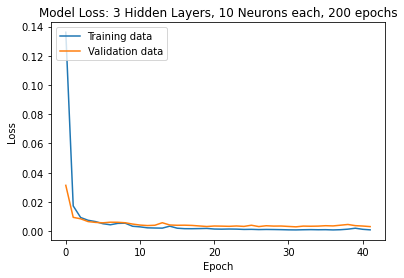

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Accuracy: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()

In [40]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_valid= model.predict(X_valid)
scores1 = model.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}'.format(scores1[1], 1 - scores1[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

32/32 [==============================] - 0s 1ms/step
Accuracy on training data: 0.0011910333996638656% 
 Error on training data: 0.9988089666003361
14/14 [==============================] - 0s 1ms/step
Accuracy on validation data: 0.004184845369309187% 
 Error on validation data: 0.9958151546306908
12/12 [==============================] - 0s 1ms/step
Accuracy on test data: 0.003407134907320142% 
 Error on test data: 0.9965928650926799


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

# Print the results
print("Training Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Training Error Measurements
MAE: 0.021487232567874166
MSE: 0.001191033358094604
RMSE: 0.03451135114849321
R2 score: 0.990017763362313


In [42]:

mae = mean_absolute_error(y_valid, pred_valid)
mse = mean_squared_error(y_valid, pred_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, pred_valid)

# Print the results
print("Validataion Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Validataion Error Measurements
MAE: 0.03709280419963133
MSE: 0.004184845777608357
RMSE: 0.06469038396553507
R2 score: 0.9648035136065964


In [47]:

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# Print the results
print("Testing Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


Testing Error Measurements
MAE: 0.03782475081886276
MSE: 0.0034071347849327174
RMSE: 0.058370667161963444
R2 score: 0.9712779408303522


In [48]:
def regenerate_from_min_max_scaled(scaled_x, min_val, max_val):
    regenerated_x = scaled_x * (max_val - min_val) + min_val
    return regenerated_x

In [61]:
all_scores



[[0.025503555312752724, 0.025503555312752724],
 [0.0030978538561612368, 0.0030978538561612368],
 [0.002468394348397851, 0.002468394348397851],
 [0.0032103771809488535, 0.0032103771809488535],
 [0.0029597992543131113, 0.0029597992543131113]]